<a href="https://colab.research.google.com/github/benjaminpilnick/Stat362-Final-Project-/blob/main/explaratory_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Inputting the data
df = pd.read_csv('Data/household_power_consumption.txt', sep=';')
display(df.head())

/var/folders/k7/8yrsgrc16mg4bcd162_v2wlr0000gn/T/ipykernel_78514/3082440888.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Exploratory Data Analysis

## Variables in Dataset

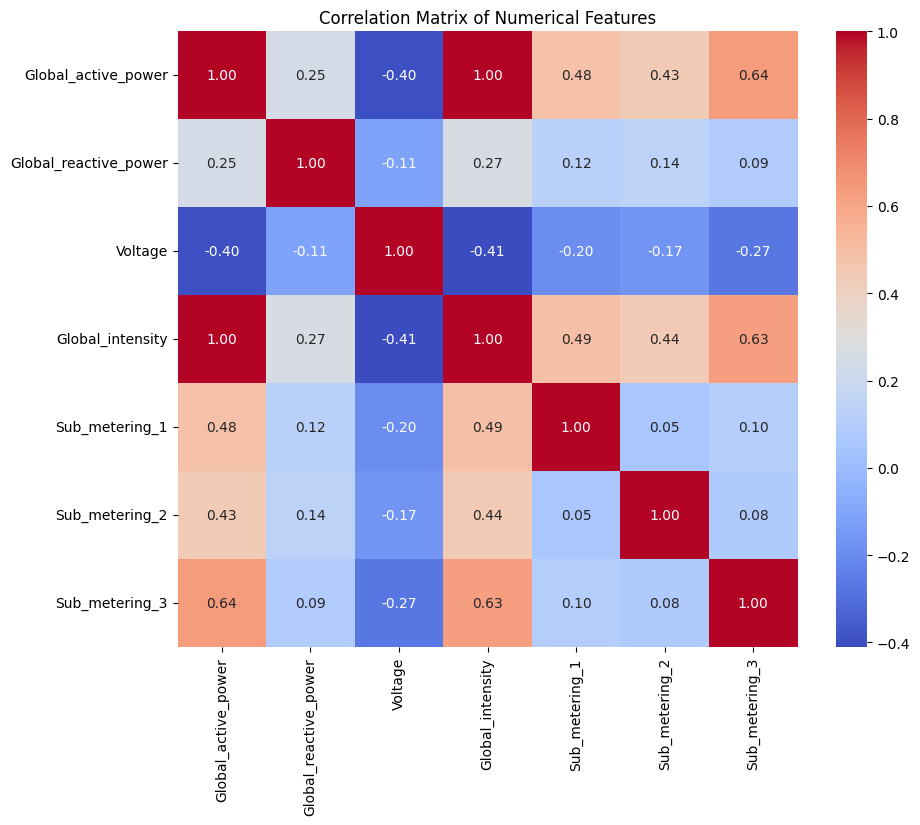

In [40]:
# Convert relevant columns to numeric, coercing errors
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [41]:
#Look at the missing values
df.isnull().sum()

#Fill with the forward fill method
df.fillna(method='ffill', inplace=True)


/var/folders/k7/8yrsgrc16mg4bcd162_v2wlr0000gn/T/ipykernel_78514/1551451548.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [42]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

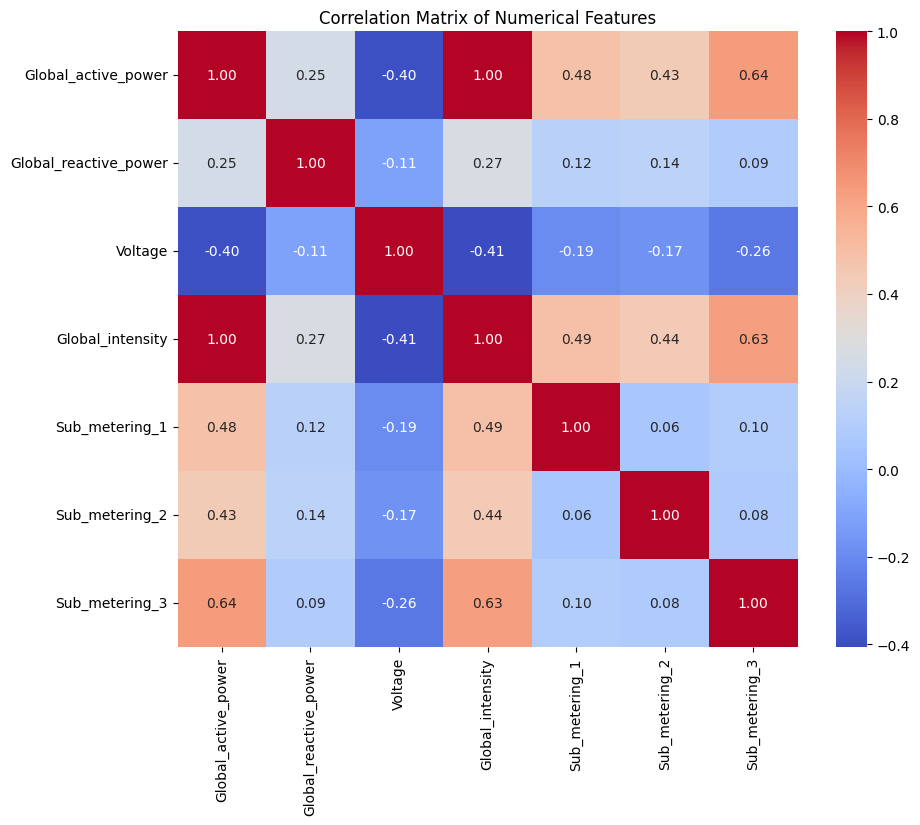

In [43]:
# Convert relevant columns to numeric, coercing errors
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Global Intensity and active power are perfect, weird.

In [44]:

#Converting to datetime for time series analysis
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format = "%d/%m/%Y %H:%M:%S")
df.drop(['Date', 'Time'], axis = 1, inplace = True)

#order the values by datetime
df.sort_values('datetime', inplace=True)

#make datetime the index
df.set_index('datetime', inplace=True)

#order 

In [45]:
#Note the Data spans from 2006-12-16 to 2010-11-26, and is recorded every minute. We want to resample to to every hour. 
df_hour = df.resample('h').mean()




In [50]:
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,34589.0,1.086200,0.894942,0.124000,0.341267,0.799533,1.574967,6.560533
Global_reactive_power,34589.0,0.123326,0.067221,0.000000,0.077667,0.106767,0.149367,0.774333
Voltage,34589.0,240.841505,2.999127,225.834500,239.197167,240.984500,242.691833,251.902000
Global_intensity,34589.0,4.604360,3.746337,0.503333,1.510000,3.406667,6.583333,28.383333
Sub_metering_1,34589.0,1.110951,3.518498,0.000000,0.000000,0.000000,0.000000,48.366667
Sub_metering_2,34589.0,1.287914,4.168720,0.000000,0.000000,0.333333,0.650000,46.433333
Sub_metering_3,34589.0,6.416515,7.344718,0.000000,0.650000,1.650000,14.083333,21.550000


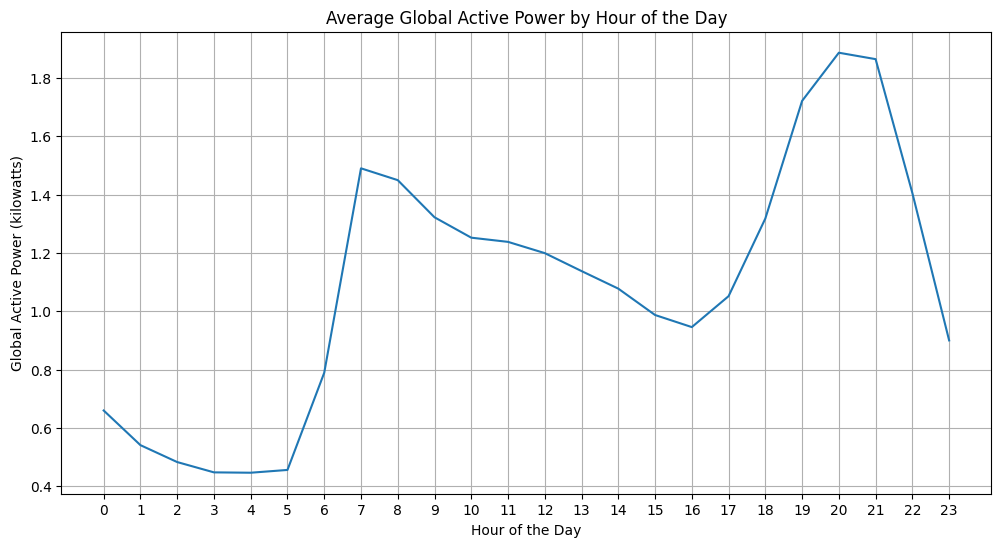

In [51]:
#How does Global Active Power change over each hour of the day? 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x=df_hour.index.hour, y='Global_active_power', errorbar = None)
plt.title('Average Global Active Power by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

- `Low Usage`
    - Hours: 0 to 5
- `Peak Morning Hours`
    - Hours 6 to 8 
- `Medium Usage`
    - Hours 9 to 17
- `Peak Evening Hours`
    - Hours 18 to 21
- `Low Usage`
    - Hours 22 to 23

### Preprocessing

In [52]:
#Splitting the data into train, validation, and test sets (70%, 15%, 15%)
# Get the number of samples
n = len(df_hour)

# Compute split indices
train_end = int(0.7 * n)
val_end = int(0.85 * n)  # 70% + 15%

# Split without shuffling (important for time series!)
train = df_hour.iloc[:train_end]
val = df_hour.iloc[train_end:val_end]
test = df_hour.iloc[val_end:]

print(f"Train shape: {train.shape}, Validation shape: {val.shape}, Test shape: {test.shape}")
train.head()

Train shape: (24212, 7), Validation shape: (5188, 7), Test shape: (5189, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [70]:
# Scaling data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_Y = StandardScaler()


#Define X_cols:
X_cols = ['Global_reactive_power', 'Voltage', 'Global_intensity', 
          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

train_scaled = train.copy()
train_scaled = scaler_X.fit_transform(train[X_cols])
y_train = scaler_Y.fit_transform(train[['Global_active_power']])

#Recreate dataframe with the datetime column as index
train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=X_cols) 


val_scaled = val.copy()

#Scaling the validation and test sets
val_scaled = scaler_X.transform(val[X_cols])
val_y = scaler_Y.transform(val[['Global_active_power']])

#Recreate dataframe with the datetime column as index
val_scaled = pd.DataFrame(val_scaled, index=val.index, columns=X_cols)

test_scaled = test.copy()

test_scaled = scaler_X.transform(test[X_cols])
test_y = scaler_Y.transform(test[['Global_active_power']])

#Recreate dataframe with the datetime column as index
test_scaled = pd.DataFrame(test_scaled, index=test.index, columns=X_cols)

In [71]:
# Shapes of scaled datasets
print(f"Train scaled shape: {train_scaled.shape}, Validation scaled shape: {val_scaled.shape}, Test scaled shape: {test_scaled.shape}")

Train scaled shape: (24212, 6), Validation scaled shape: (5188, 6), Test scaled shape: (5189, 6)


In [73]:
#Create sliding windows that has a look back of 24hours and predicts 1 hour ahead. This will then allow us to get predictions for every hour
def create_sliding_windows(X, y, look_back=24, forecast_horizon=1):
    X_windows, y_windows = [], []
    for i in range(len(X) - look_back - forecast_horizon + 1):
        X_windows.append(X.iloc[i:i + look_back].values)
        y_windows.append(y[i + look_back + forecast_horizon - 1])
    return np.array(X_windows), np.array(y_windows)

X_train, y_train_windows = create_sliding_windows(train_scaled, y_train)
X_val, y_val_windows = create_sliding_windows(val_scaled, val_y)
X_test, y_test_windows = create_sliding_windows(test_scaled, test_y)



In [75]:
X_train.shape

(24188, 24, 6)